#Importing Libraries:

In [42]:
import torch
import torch.nn as nn #For Neural Networks
import torch.nn.functional as F #For performing funcitons on NN
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Command to display plot directly in the notebook instead of a separate window

#Model Class:

In [43]:
#Model Class: (Iris Dataset)
class Model(nn.Module):
  #Input Layer (4 features)
  #Hidden Layer 1 (number of neurons n)
  #Hidden Layer 2 (n)
  #Output Layer (3 classes)

  #constructor:
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    #Layers:
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [44]:
#Manual Seed for randomization:
torch.manual_seed(52)

In [45]:
#Class instance:
m = Model()

#Loading Data:

In [46]:
#Loading data from url
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

#Creating dataframe
my_df = pd.read_csv(url)

my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [47]:
print(my_df.head()) #Prints first 5 rows

print(my_df.tail()) #Prints last 5 rows

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
     sepal.length  sepal.width  petal.length  petal.width    variety
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica


In [48]:
#Label encoding the variety column
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

my_df

<ipython-input-48-12e8f2f91d0d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


#Training and Testing Set:

In [49]:
#Setting x (input variables) & y(target variable)
x = my_df.drop('variety', axis=1)
#axis = 1, means drop column named 'variety'
#axis = 0, means drop row named 'variety'

y = my_df['variety']

print(x)
print(y)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64


In [50]:
#Converting pandas dataframe to numpy arrays
x = x.values
y = y.values

print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [51]:
#Spliting x & y into training & testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 52)

In [52]:
#Converting numpy arrays to tensors:
X_train = torch.FloatTensor(X_train) #Using FloatTensor because inputs in float
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train) #Using LongTensor because y expected as integer
y_test = torch.LongTensor(y_test)

#Set Criterion and Optimizer:

In [53]:
criterion = nn.CrossEntropyLoss() #Error Function

optimizer = torch.optim.Adam(m.parameters(), lr = 0.01) #Adam optimizer with initial learning rate of 0.01

#Training the model:

In [54]:
epochs = 100
losses = []

for i in range(epochs):

  #Make prediction:
  y_pred = m.forward(X_train)

  #Calculating loss, predicted vs actual target value
  loss = criterion(y_pred, y_train)

  #Append current epoch's loss to losses and convert to numpy array
  losses.append(loss.detach().numpy())

  #Print current epoch number and loss every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i}, loss: {loss}')

  #Backpropagation:
  optimizer.zero_grad() #Sets gradient to zero to compute gradient for current batch only
  loss.backward() #Compute gradients of the loss(Backpropagation)
  optimizer.step() #Updates parameters using the computed gradients

Epoch: 0, loss: 1.0909538269042969
Epoch: 10, loss: 0.9050934314727783
Epoch: 20, loss: 0.6275200843811035
Epoch: 30, loss: 0.43026986718177795
Epoch: 40, loss: 0.33511847257614136
Epoch: 50, loss: 0.24545659124851227
Epoch: 60, loss: 0.16025544703006744
Epoch: 70, loss: 0.09729448705911636
Epoch: 80, loss: 0.0630621463060379
Epoch: 90, loss: 0.04528171941637993


#Plotting Training Loss Curve:

Text(0.5, 0, 'Epoch')

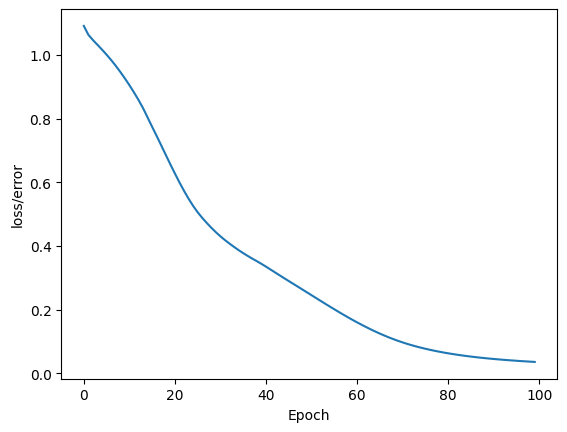

In [55]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

#Testing the Model:

In [56]:
with torch.no_grad(): #Turns off backpropagation
  y_eval = m.forward(X_test) #y_eval are the predictions made using X_test features
  loss = criterion(y_eval, y_test) #loss of test set

print(loss)

tensor(0.1405)


In [57]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = m.forward(data)

    #Comparing predicted and actual value
    print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1
    #argmax() returns index of max value
    #item() converts single value tensor to number

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1. tensor([ 3.0451, -2.3538, -4.2072]) 	 0 	 0
2. tensor([ 5.0977, -4.6470, -5.7676]) 	 0 	 0
3. tensor([-10.6364,   2.4051,  10.6494]) 	 2 	 2
4. tensor([-9.6283,  3.1274,  9.0904]) 	 2 	 2
5. tensor([-10.1980,   3.7657,   9.3598]) 	 2 	 2
6. tensor([-6.4156,  7.2844,  3.0375]) 	 1 	 1
7. tensor([-4.0792,  5.6087,  1.3288]) 	 1 	 1
8. tensor([ 2.6654, -1.9231, -3.6807]) 	 0 	 0
9. tensor([-11.6036,   2.7950,  11.5123]) 	 2 	 2
10. tensor([-9.6771,  5.8733,  7.5406]) 	 2 	 2
11. tensor([-9.6018,  3.5187,  8.8318]) 	 2 	 2
12. tensor([-10.3980,   2.0737,  10.5743]) 	 2 	 2
13. tensor([-7.8760,  3.9476,  6.6347]) 	 1 	 2
14. tensor([ 3.8114, -3.2069, -4.6801]) 	 0 	 0
15. tensor([-10.2161,   3.7692,   9.3781]) 	 2 	 2
16. tensor([-12.9352,   1.1919,  13.9511]) 	 2 	 2
17. tensor([ 2.8680, -2.1559, -4.0698]) 	 0 	 0
18. tensor([-8.7385,  4.0107,  7.5705]) 	 2 	 2
19. tensor([-10.2651,   3.2634,   9.7290]) 	 2 	 2
20. tensor([ 3.5231, -2.8872, -4.5478]) 	 0 	 0
21. tensor([-3.0954,  4.5044

#Using Model on New Data:

In [58]:
new_data = torch.tensor([4.7, 3.2, 1.3, 0.2])

with torch.no_grad():
  print(m.forward(new_data))

tensor([ 4.3556, -3.8154, -5.1141])


#Saving the Model:

In [59]:
#Saving the model for reuse later:
torch.save(m.state_dict(), 'my_iris_model.pt') #Saves the weights and bias of the model in a dictionary

In [60]:
!ls

my_iris_model.pt  sample_data


#Loading the Model:

In [61]:
new_m = Model() #Creating a new instance of the model class

new_m.load_state_dict(torch.load('my_iris_model.pt', weights_only=True)) #Loading the weights and bias from the dictionary

new_m.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)